# Predicting Loan Default with Machine Learning

The goal of this notebook is to predict whether or not a loan will default based on information known at the time of loan origination.

## Workflow

1. Start the H2O-3 cluster
2. Import data
3. Explore the data
4. Train a GBM Model
5. Examine the GBM Model
6. Productionize
7. SHutting of the cluster

# Step 1 (of 6). Start the H2O-3 cluster

<img src="./images/import H2O.png" style="width:600px">


In [67]:
import h2o 
#h2o.init(max_mem_size = "4g")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.4" 2019-07-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.4+10-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.4+10-LTS, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/bh/3d086kf929d89hcjfslrb__c0000gn/T/tmp6amdafye
  JVM stdout: /var/folders/bh/3d086kf929d89hcjfslrb__c0000gn/T/tmp6amdafye/h2o_parulpandey_started_from_python.out
  JVM stderr: /var/folders/bh/3d086kf929d89hcjfslrb__c0000gn/T/tmp6amdafye/h2o_parulpandey_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,1 month and 18 days
H2O cluster name:,H2O_from_python_parulpandey_rs3n6v
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"accepting new members, healthy"


We use the `h2o.init` command to connect to the H2O-3 cluster, starting it if it is not already up. The parameters used in `h2o.init` will depend on your specific environment.

Set the correct cluster size for your given dataset size. The rule of thumb is to use at least 4 times the size of your data. For example, if the dataset is 10GB, you should allocate at least 40GB of memory.

# Step 2 (of 6). Import Data

This exploration of H2O will use a version of the Lending Club Loan Data that can be found on [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data). This data consists of 15 variables:

|  Id   | Column Name | Description |
| --- | ----------- | ----------- |
|   1 | loan_amnt   | Requested loan amount (US dollars) |
|   2 | term        | Loan term length (months) |
|   3 | int_rate    | Recommended interest rate |
|   4 | emp_length  | Employment length (years) |
|   5 | home_ownership| Housing status |
|   6 | annual_inc  | Annual income (US dollars) |
|   7 | purpose     | Purpose for the loan |
|   8 | addr_state  | State of residence |
|   9 | dti         | Debt to income ratio |
|  10 | delinq_2yrs | Number of delinquencies in the past 2 years |
|  11 | revol_util  | Percent of revolving credit line utilized |
|  12 | total_acc   | Number of active accounts |
|  13 | bad_loan    | Bad loan indicator |
|  14 | longest_credit_length | Age of oldest active account |
|  15 | verification_status | Income verification status |

In [42]:
input_csv = "loan.csv"
loans = h2o.import_file(input_csv)

Parse progress: |█████████████████████████████████████████████████████████| 100%


<div class="alert alert-block alert-info"><span style="color:black">
Besides delimited files (CSV and gzipped CSV), H2O-3 currently supports the following file types:

- ORC
- SVMLight
- ARFF
- XLS (BIFF 8 only)
- XLSX (BIFF 8 only)
- Avro version 1.8.0 (without multifile parsing or column type modification)
- Parquet
</span></div>

### H2O Frame

- Distributed data frames (collection of vectors)
- Columns are distributed (across nodes) arrays
- H2O Frames work just like R `data.frame` or Python Pandas `DataFrame`


In [8]:
loans.head()

loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
5000,36 months,10.65,10,RENT,24000,credit_card,AZ,27.65,0,83.7,9,0,26,verified
2500,60 months,15.27,0,RENT,30000,car,GA,1,0,9.4,4,1,12,verified
2400,36 months,15.96,10,RENT,12252,small_business,IL,8.72,0,98.5,10,0,10,not verified
10000,36 months,13.49,10,RENT,49200,other,CA,20,0,21,37,0,15,verified
5000,36 months,7.9,3,RENT,36000,wedding,AZ,11.2,0,28.3,12,0,7,verified
3000,36 months,18.64,9,RENT,48000,car,CA,5.35,0,87.5,4,0,4,verified
5600,60 months,21.28,4,OWN,40000,small_business,CA,5.55,0,32.6,13,1,7,verified
5375,60 months,12.69,0,RENT,15000,other,TX,18.08,0,36.5,3,1,7,verified
6500,60 months,14.65,5,OWN,72000,debt_consolidation,AZ,16.12,0,20.6,23,0,13,not verified
12000,36 months,12.69,10,OWN,75000,debt_consolidation,CA,10.78,0,67.1,34,0,22,verified


In [11]:
loans.describe()

Rows:163987
Cols:15




,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
type,int,enum,real,int,enum,real,enum,enum,real,int,real,int,int,int,enum
mins,500.0,,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,0.0,0.0,
mean,13074.169141456337,,13.715904065566173,5.684352932995329,,71915.670519749,,,15.881530121290105,0.2273570060625282,54.07917280242256,24.579733834274627,0.1830388994249544,14.854273655448347,
maxs,35000.0,,26.06,10.0,,7141778.0,,,39.99,29.0,150.70000000000002,118.0,1.0,65.0,
sigma,7993.55618873465,,4.3919398705457935,3.610663731100236,,59070.91565491825,,,7.587668224192548,0.6941679229284182,25.285366766770505,11.685190365910659,0.3866995896078875,6.947732922546696,
zeros,0,,0,14248,,0,,,270,139459,1562,0,133971,11,
missing,0,0,0,5804,0,4,0,0,0,29,193,29,0,29,0
0,5000.0,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0.0,26.0,verified
1,2500.0,60 months,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,1.0,12.0,verified
2,2400.0,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0.0,10.0,not verified


We will change the `bad_loan` column from numeric to categorical.  Our goal is to predict whether a loan is bad or not so we want this column to be treated like yes/no rather than 0 or 1.

In [47]:
loans["bad_loan"] = loans["bad_loan"].asfactor()

loans.describe()

Rows:163987
Cols:15




,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
type,int,enum,real,int,enum,real,enum,enum,real,int,real,int,enum,int,enum
mins,500.0,,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,,0.0,
mean,13074.169141456337,,13.715904065566173,5.684352932995329,,71915.670519749,,,15.881530121290105,0.2273570060625282,54.07917280242256,24.579733834274627,,14.854273655448347,
maxs,35000.0,,26.06,10.0,,7141778.0,,,39.99,29.0,150.70000000000002,118.0,,65.0,
sigma,7993.55618873465,,4.3919398705457935,3.610663731100236,,59070.91565491825,,,7.587668224192548,0.6941679229284182,25.285366766770505,11.685190365910659,,6.947732922546696,
zeros,0,,0,14248,,0,,,270,139459,1562,0,,11,
missing,0,0,0,5804,0,4,0,0,0,29,193,29,0,29,0
0,5000.0,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500.0,60 months,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,1,12.0,verified
2,2400.0,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified


# Step 3 (of 6). Explore the Data


Now that we have imported the data, we will examine the columns in the dataset.

In [48]:
# Calculate the number of bad and good loans
loans["bad_loan"].table()

bad_loan,Count
0,133971
1,30016


In [49]:
%matplotlib inline

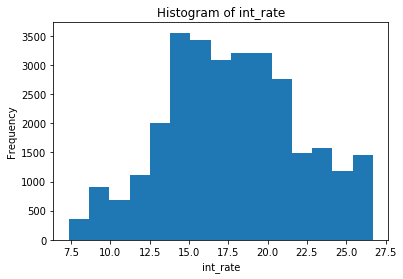

In [50]:
# Visualize the distribution of `int_rate` for bad loans
loans[loans["bad_loan"] == "1"]["int_rate"].hist()

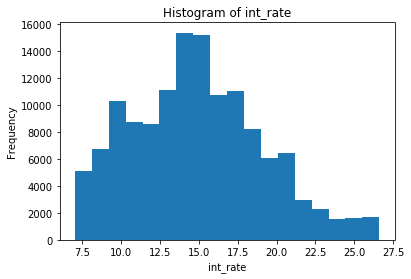

In [52]:
# Visualize the distribution of `int_rate` for good loans
loans[loans["bad_loan"] == "0"]["int_rate"].hist()

We can also see that the interest rate is typically greater for bad loans.  We can assume that the `int_rate` will be helpful in determining if the loan will default.



# Step 4 (of 6). Train a GBM Model


Now that we have examined the data, we will train a Gradient Boosting Model to predict `bad_loan`.  We will first randomly split our data into training and testing.  We will use the testing data to see how well the model is able to predict loan default on new loans.  This will mimic how the model will perform in production.

In [53]:
# Split data into 75% train and 25% test
train, test = loans.split_frame(seed = 1234, ratios=[0.75], destination_frames=["train", "test"])

In [56]:
# Train GBM with one tree
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator(model_id = "gbm", ntrees = 10)
gbm_model.train(y = "bad_loan", training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [57]:
gbm_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,10.0,5308.0,5.0,5.0,5.0,31.0,32.0,31.8




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13904129723034997
RMSE: 0.37288241743256006
LogLoss: 0.44228363612282684
Mean Per-Class Error: 0.3507377910416285
AUC: 0.7063745430087265
pr_auc: 0.35376066820668967
Gini: 0.41274908601745297

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20271148017267396: 


,,0,1,Error,Rate
0,0,72231.0,28320.0,0.2816,(28320.0/100551.0)
1,1,9623.0,12888.0,0.4275,(9623.0/22511.0)
2,Total,81854.0,41208.0,0.3083,(37943.0/123062.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.202711,0.404526,220.0
1,max f2,0.140941,0.564824,318.0
2,max f0point5,0.265436,0.377006,128.0
3,max accuracy,0.350448,0.819506,37.0
4,max precision,0.467827,1.000000,0.0
5,max recall,0.085840,1.000000,398.0
6,max specificity,0.467827,1.000000,0.0
7,max absolute_mcc,0.202711,0.238277,220.0
8,max min_per_class_accuracy,0.185949,0.648238,246.0
9,max mean_per_class_accuracy,0.180569,0.649262,254.0



Gains/Lift Table: Avg response rate: 18.29 %, avg score: 18.35 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.353856,3.335117,3.335117,0.610073,0.378014,0.610073,0.378014,0.033361,0.033361,233.511693,233.511693
1,,2,0.020022,0.335038,2.686821,3.010706,0.491484,0.344108,0.550731,0.361048,0.026920,0.060282,168.682097,201.070584
2,,3,0.030001,0.321235,2.444011,2.822217,0.447068,0.328044,0.516251,0.350070,0.024388,0.084670,144.401101,182.221688
3,,4,0.040118,0.311975,2.586278,2.762718,0.473092,0.316515,0.505368,0.341609,0.026165,0.110835,158.627752,176.271830
4,,5,0.050007,0.304654,2.308882,2.672969,0.422350,0.307814,0.488950,0.334925,0.022833,0.133668,130.888191,167.296872
5,,6,0.100031,0.277938,2.031826,2.352345,0.371670,0.289962,0.430301,0.312440,0.101639,0.235307,103.182636,135.234546
6,,7,0.150014,0.259550,1.717080,2.140682,0.314095,0.268317,0.391582,0.297739,0.085825,0.321132,71.708018,114.068213
7,,8,0.200005,0.241770,1.519529,1.985425,0.277958,0.250188,0.363182,0.285853,0.075963,0.397095,51.952890,98.542537
8,,9,0.300060,0.210736,1.323954,1.764857,0.242183,0.226133,0.322835,0.265940,0.132469,0.529563,32.395414,76.485733
9,,10,0.400010,0.187314,1.135128,1.607508,0.207642,0.198526,0.294052,0.249095,0.113456,0.643019,13.512833,60.750823




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-11-20 11:58:04,0.013 sec,0.0,0.386604,0.475799,0.500000,0.000000,1.000000,0.817076
1,,2019-11-20 11:58:04,0.239 sec,1.0,0.383984,0.469160,0.688417,0.317658,2.542461,0.346614
2,,2019-11-20 11:58:04,0.415 sec,2.0,0.381811,0.463795,0.693838,0.325628,2.828651,0.357137
3,,2019-11-20 11:58:05,0.558 sec,3.0,0.380002,0.459408,0.696490,0.331776,2.927670,0.326161
4,,2019-11-20 11:58:05,0.649 sec,4.0,0.378433,0.455633,0.698839,0.338307,3.023147,0.318165
5,,2019-11-20 11:58:05,0.779 sec,5.0,0.377134,0.452474,0.701430,0.341520,3.073391,0.331573
6,,2019-11-20 11:58:05,0.873 sec,6.0,0.376027,0.449820,0.702664,0.344766,3.205246,0.324625
7,,2019-11-20 11:58:05,0.950 sec,7.0,0.375075,0.447543,0.703559,0.347177,3.208085,0.314598
8,,2019-11-20 11:58:05,1.076 sec,8.0,0.374238,0.445519,0.704480,0.349733,3.277385,0.342868
9,,2019-11-20 11:58:05,1.152 sec,9.0,0.373544,0.443833,0.705162,0.350933,3.265048,0.336148



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,int_rate,4515.744141,1.000000,0.680807
1,annual_inc,732.340576,0.162175,0.110410
2,addr_state,382.063232,0.084607,0.057601
3,term,289.623444,0.064136,0.043665
4,dti,254.860611,0.056438,0.038424
5,purpose,167.230453,0.037033,0.025212
6,loan_amnt,150.780350,0.033390,0.022732
7,home_ownership,39.730812,0.008798,0.005990
8,emp_length,36.680832,0.008123,0.005530
9,revol_util,33.809113,0.007487,0.005097


In [58]:
# Calculate the prediction for the first row in the test data
pred = gbm_model.predict(test[0, :])
pred.col_names = ["predict", "prob_good", "prob_bad"]
pred

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,prob_good,prob_bad
0,0.818239,0.181761


In [59]:
# Calculate the model performance on the test data
gbm_model.model_performance(test).auc()

0.6956454145271594

# Step 5 (of 6). Examine the GBM Model

We will see what variables impact the model prediction.

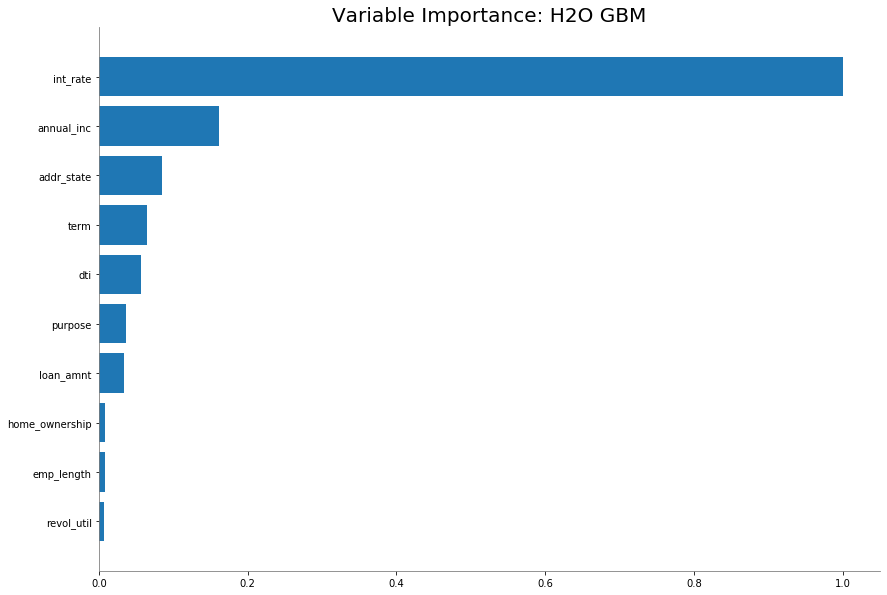

In [60]:
gbm_model.varimp_plot()


The variable importance plot shows us which variables are most important to predicting `bad_loan`.  We can use partial dependency plots to learn more about how these variables affect the prediction.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model gbm on column 'int_rate'


,int_rate,mean_response,stddev_response,std_error_mean_response
0,5.420000,0.105955,0.015830,0.000045
1,6.506316,0.105955,0.015830,0.000045
2,7.592632,0.107784,0.014726,0.000042
3,8.678947,0.119489,0.019994,0.000057
4,9.765263,0.139936,0.022275,0.000063
5,10.851579,0.150096,0.028131,0.000080
6,11.937895,0.153833,0.029477,0.000084
7,13.024211,0.164457,0.031680,0.000090
8,14.110526,0.182426,0.029550,0.000084
9,15.196842,0.197080,0.031458,0.000090


[]

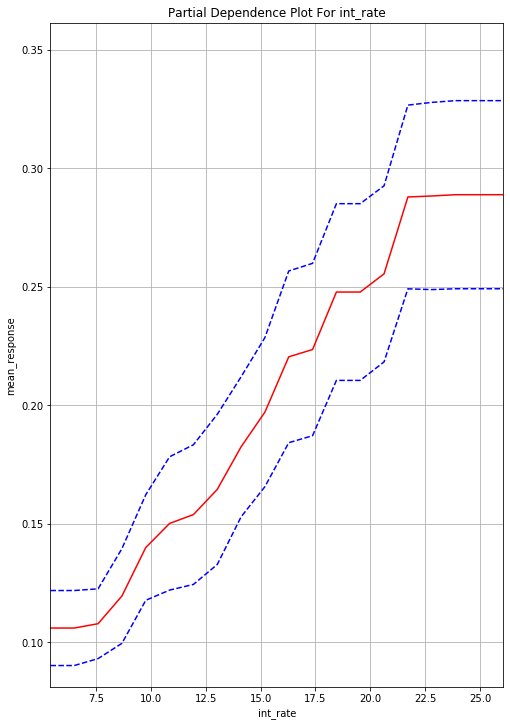

In [61]:
gbm_model.partial_plot(data=train, cols=["int_rate"])

# Step 6 : Productionize

## Save and reuse model

The model can either be embedded into a self-contained Java MOJO package
or it can be saved and later loaded directly into an H2O-3 cluster. For production
use, we recommend using MOJO as it is optimized for speed. See the [guide](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/productionizing.html) for further information.

#### Downloading MOJO

Creating and downloading a MOJO is a simple matter of using the `download_mojo` method

<img src="./images/webpage.png" style="width:600px">


<img src="./images/web app 2.png" style="width:600px">

In [62]:
gbm_model.download_mojo()

'/Users/parulpandey/Desktop/Pyladies Hyd/gbm.zip'

### Save and reuse the model 

We can also save the model to disk for later use.

In [63]:
model_path = h2o.save_model(model=gbm_model, force=True)
print(model_path)

/Users/parulpandey/Desktop/Pyladies Hyd/gbm


After the H2O cluster shuts down, all unsaved data and models are lost. At some future date, we can load the model for batch scoring in the H2O cluster.

In [31]:
loaded_model = h2o.load_model(path=model_path)

Using that model, we can also score new data with the predict function:

In [65]:
bad_loan_hat = loaded_model.predict(test)
bad_loan_hat.head(15)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.818239,0.181761
0,0.863957,0.136043
1,0.782018,0.217982
0,0.914073,0.0859267
0,0.863957,0.136043
0,0.846427,0.153573
0,0.846427,0.153573
0,0.866308,0.133692
0,0.834004,0.165996
0,0.857971,0.142029


# Step 7. Stop the H2O-3 server

_Once your work is completed, shutting down the H2O cluster frees up the resources reserved by H2O._

In [66]:
h2o.cluster().shutdown(prompt = True)


Are you sure you want to shutdown the H2O instance running at http://localhost:54321 (Y/N)? y
H2O session _sid_947e closed.


# Tutorials
https://h2oai.github.io/tutorials/